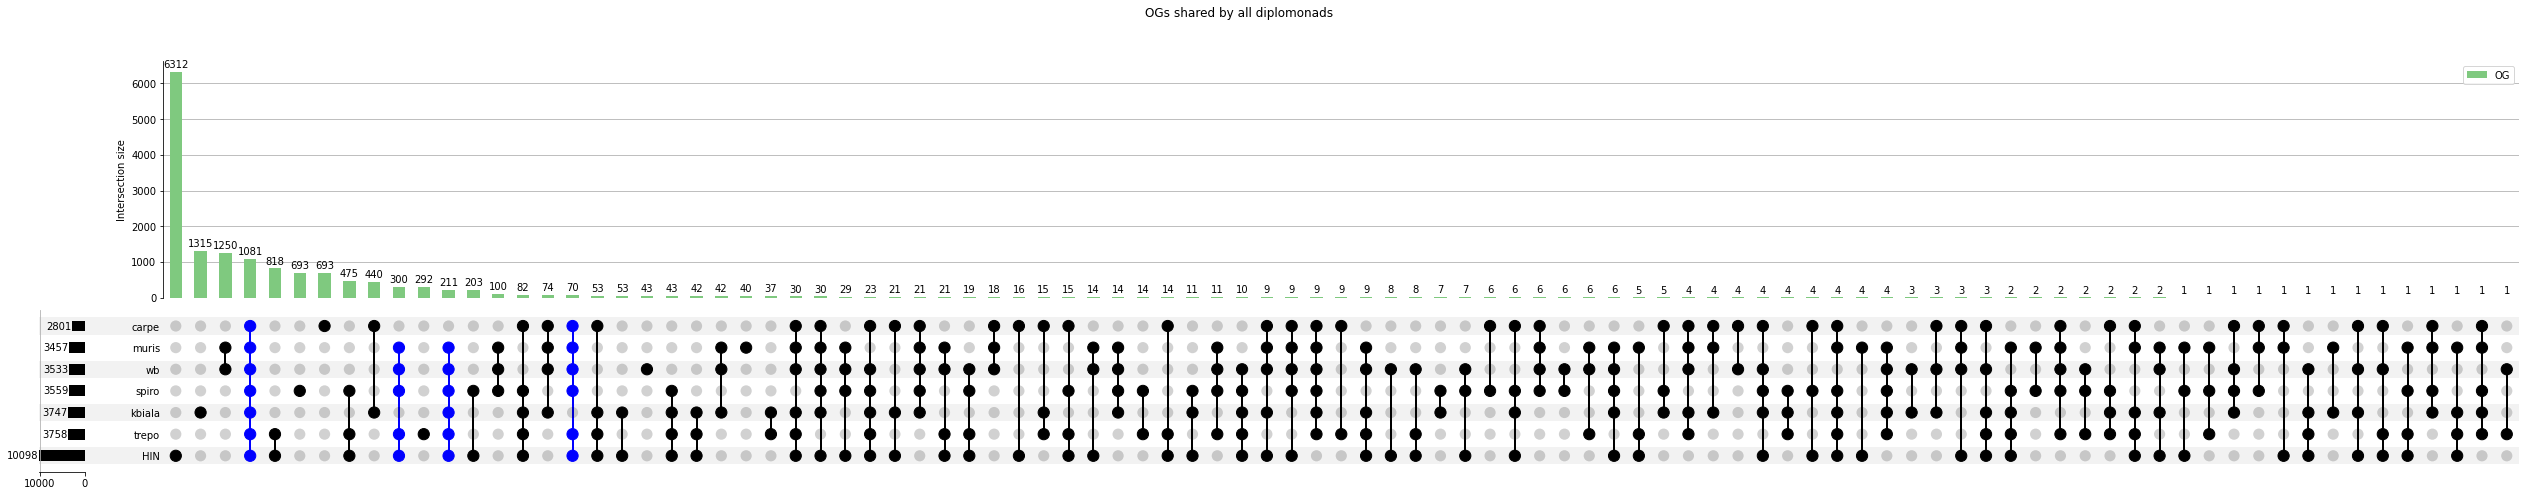

In [48]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=0,
              show_counts=True, sort_categories_by="cardinality", sort_by="cardinality")  # disable the default bar chart

upset.add_stacked_bars(by="Type", colors=cm.Accent,
                       title="Intersection size", elements=10)

upset.style_subsets(present=["HIN", "trepo", "spiro", "wb", "muris"],
                    facecolor="blue",
                    label="OGs shared by all diplomonads")

upset.plot()
plt.suptitle("OGs shared by all diplomonads")
plt.show()

# Extract Proteins


In [52]:
"OG shared by all diplomonads"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_diplo=df[(df.iloc[:,[1,2,3,4,5]] >=1).all(1)]

print("Total HIN genes =", og_diplo["HIN"].sum())
print("Total trepo genes =", og_diplo["trepo"].sum())
print("Total spiro genes =", og_diplo["spiro"].sum())
print("Total wb genes =", og_diplo["wb"].sum())
print("Total muris genes =", og_diplo["muris"].sum())

og_diplo

Total HIN genes = 9220
Total trepo genes = 2639
Total spiro genes = 2426
Total wb genes = 2101
Total muris genes = 2143


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
5,OG0000005,18,13,17,159,216,9,12,444
19,OG0000019,228,13,11,7,2,6,9,276
39,OG0000039,133,16,6,4,6,10,3,178
42,OG0000042,51,18,19,14,14,26,23,165
57,OG0000057,91,12,6,5,7,8,5,134
...,...,...,...,...,...,...,...,...,...
4963,OG0004963,2,1,1,1,1,0,0,6
4964,OG0004964,2,1,1,1,1,0,0,6
4967,OG0004967,1,1,2,1,1,0,0,6
6008,OG0006008,1,1,1,1,1,0,0,5


In [51]:
import pandas as pd

OG_gene_list = pd.read_csv(
    '/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.txt',
    header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))
OG_gene_list
"extract proteins from OG"


def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df


extract_prot(og_diplo).T

,OG0000005,OG0000019,OG0000039,OG0000042,OG0000057,OG0000072,OG0000086,OG0000090,OG0000093,OG0000099,...,OG0004920,OG0004927,OG0004928,OG0004930,OG0004939,OG0004963,OG0004964,OG0004967,OG0006008,OG0006077
1,GL50803_101397,GL50803_10217,GL50803_115052,GL50803_112729,GL50803_15477,GL50803_16283,GL50803_13231,GL50803_15097,GL50803_103713,GL50803_16815,...,GL50803_5603,GL50803_8604,GL50803_11557,GL50803_11771,GL50803_16192,GL50803_14054,GL50803_8135,GL50803_17280,GL50803_9427,GL50803_16926
2,GL50803_102034,GL50803_14019,GL50803_17132,GL50803_13797,GL50803_29490,GL50803_6000,GL50803_16411,GMRT_10288,GL50803_14670,GL50803_8044,...,GMRT_10909,GMRT_12712,GMRT_15190,GMRT_15517,GMRT_13762,GMRT_14394,GMRT_13346,GMRT_14388,GMRT_13197,GMRT_10817
3,GL50803_102813,GL50803_15564,GL50803_221689,GL50803_13825,GL50803_4563,GL50803_61047,GMRT_13622,HIN_001559,GL50803_8064,GMRT_10547,...,HIN_065946,HIN_066682,HIN_066689,HIN_066967,HIN_070252,HIN_090757,HIN_090772,HIN_093020,HIN_059843,HIN_097892
4,GL50803_103807,GL50803_16160,GL50803_28379,GL50803_15134,GL50803_5534,GL50803_91295,GMRT_14177,HIN_001615,GL50803_9413,HIN_002143,...,HIN_070852,HIN_078130,HIN_078124,HIN_094476,HIN_093955,HIN_093023,HIN_093860,SS50377_24151,SS50377_21191,SS50377_25538
5,GL50803_10573,GL50803_16468,GMRT_11508,GL50803_15962,GL50803_8903,GL50803_91712,HIN_002761,HIN_001622,GMRT_12939,HIN_003532,...,SS50377_23242,SS50377_21232,SS50377_23334,SS50377_23592,SS50377_28224,SS50377_25390,SS50377_28335,SS50377_24154,TPC1_11163,TPC1_16186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
